In [1]:
import os
import re
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{ulem}')
matplotlib.rcParams.update({'font.size': 14})
plt.rc('font', family='Times New Roman')


import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(rc={'text.usetex' : True})

max_len = None

In [2]:
# os.chdir('..')
os.chdir(os.path.expanduser("~/clm"))

In [3]:
# fig_vis_entro
exps: list[str] = [
    "NoPE50k(4k)",
    "NoPE50k_s1.2(4k)",
    "RoPE50k(4k)",
    "RoPE50k_NTK2(4k)",
]
loss_lines: dict[str, Path] = {
    "NoPE50k(4k)": Path("ckpts_arxiv/gs/tnl2_50k_eval_gs_16k/runs/1.00_Feb14_21-11-02"),
    "NoPE50k_s1.2(4k)": Path("ckpts_arxiv/gs/tnl2_50k_eval_gs_16k/runs/1.20_Feb14_21-16-15"),
    "RoPE50k(4k)": Path("ckpts_arxiv/llama_eval_pos/runs/RoPE50k(4k)|Feb15_14-22-49"),
    "RoPE50k_NTK2(4k)": Path("ckpts_arxiv/llama_eval_pos/runs/RoPE50k_NTK2(4k)|Feb15_14-25-40"),
}
name_map: dict[str, str] = {
    "NoPE50k(4k)": r'\textbf{NoPE}',
    "NoPE50k_s1.2(4k)" : r'\textbf{NoPE} $\lambda=\frac{1.2}{\sqrt{d}}$',
    "RoPE50k(4k)": r'\textbf{RoPE}',
    "RoPE50k_NTK2(4k)": r'\textbf{RoPE} NTK',
}

In [4]:
# fig_vis_uni_scale_entro_nope
# exps: list[str] = [
#     "NoPE50k_s0.9(4k)",
#     "NoPE50k(4k)",
#     "NoPE50k_s1.1(4k)",
#     "NoPE50k_s1.2(4k)",
# ]
# loss_lines: dict[str, Path] = {
#     "NoPE50k_s0.9(4k)": Path("ckpts_arxiv/gs/tnl2_50k_eval_gs_16k/runs/0.90_Feb14_20-35-30"),
#     "NoPE50k(4k)": Path("ckpts_arxiv/gs/tnl2_50k_eval_gs_16k/runs/1.00_Feb14_21-11-02"),
#     "NoPE50k_s1.1(4k)": Path("ckpts_arxiv/gs/tnl2_50k_eval_gs_16k/runs/1.10_Feb14_21-38-01"),
#     "NoPE50k_s1.2(4k)": Path("ckpts_arxiv/gs/tnl2_50k_eval_gs_16k/runs/1.20_Feb14_21-16-15"),
# }
# name_map: dict[str, str] = {
#     "NoPE50k_s0.9(4k)",
#     "NoPE50k(4k)",
#     "NoPE50k_s1.1(4k)",
#     "NoPE50k_s1.2(4k)",
# }

In [5]:
# fig_vis_uni_scale_entro_rope
# exps: list[str] = [
#     "RoPE50k_s0.8(4k)",
#     "RoPE50k(4k)",
#     "RoPE50k_s1.2(4k)",
#     "RoPE50k_s1.4(4k)",
# ]
# loss_lines: dict[str, Path] = {
#     "RoPE50k_s0.8(4k)": Path("ckpts_arxiv/llama_eval_pos/runs/RoPE50k_s0.8(4k)|Feb15_17-00-09"),
#     "RoPE50k(4k)": Path("ckpts_arxiv/llama_eval_pos/runs/RoPE50k(4k)|Feb15_14-22-49"),
#     "RoPE50k_s1.2(4k)": Path("ckpts_arxiv/llama_eval_pos/runs/RoPE50k_s1.2(4k)|Feb15_17-01-59"),
#     "RoPE50k_s1.4(4k)": Path("ckpts_arxiv/llama_eval_pos/runs/RoPE50k_s1.4(4k)|Feb15_17-03-45"),
# }

In [6]:
# fig_vis_head_vs_uni_scale
# exps: list[str] = [
#     "NoPE50k_s1.6(8k)",
#     "NoPE50k_HS8k(8k)",
# ]
# loss_lines: dict[str, Path] = {
#     "NoPE50k_s1.6(8k)": Path("ckpts_arxiv/gs/tnl2_50k_eval_gs_16k/runs/1.60_Feb14_21-31-31"),
#     "NoPE50k_HS8k(8k)": Path("ckpts_arxiv/llama_eval_pos/runs/NoPE50k_HS8k(8k)|Feb15_16-57-47"),
# }
# max_len = 8192

In [7]:
ent_root = Path("ckpts_arxiv/llama_eval_entropy/runs/")
if not ent_root.exists():
    raise Exception("Path does not exist: {}".format(ent_root))
# get all folders in root_folder
folders = ent_root.iterdir()


# filter using exps
def filter_name(p: Path):
    return any(p.name.startswith(f"{exp}|") for exp in exps)


folders = sorted([f for f in folders if filter_name(f)])
pattern = re.compile(r"^([^|]+).*")
ent_lines: dict[str, Path] = {pattern.match(path.name).group(1): path for path in folders}
print(ent_lines)

{'NoPE50k(4k)': PosixPath('ckpts_arxiv/llama_eval_entropy/runs/NoPE50k(4k)|Feb14_22-57-11'), 'NoPE50k_s1.2(4k)': PosixPath('ckpts_arxiv/llama_eval_entropy/runs/NoPE50k_s1.2(4k)|Feb14_23-08-19'), 'RoPE50k(4k)': PosixPath('ckpts_arxiv/llama_eval_entropy/runs/RoPE50k(4k)|Feb14_22-53-37'), 'RoPE50k_NTK2(4k)': PosixPath('ckpts_arxiv/llama_eval_entropy/runs/RoPE50k_NTK2(4k)|Feb14_23-10-41')}


In [8]:
def moving_average(data: np.ndarray, w: int):
    assert w % 2 == 0
    # Initialize an empty array for the moving averages
    moving_avg = np.zeros_like(data, dtype=float)
    # Calculate the moving average with a window size that adjusts at the borders
    for i in range(len(data)):
        # Determine the window size
        start = max(0, i - (w // 2))
        end = min(len(data), i + (w // 2) + 1)
        window_size = end - start
        moving_avg[i] = np.sum(data[start:end]) / window_size  # Calculate the average
    return moving_avg


def load_arr(path: Path, seq_len_max: int, ent: bool = False):
    if not os.path.isfile(path):
        print(f"{str(path)} not exists")
        return [0] * seq_len_max
    arr: np.ndarray = np.load(path).astype(np.float32)
    if ent:
        arr = arr.mean(axis=(0, 1))
    seq_len = min(arr.shape[0], seq_len_max)
    arr = arr[:seq_len]
    if not ent:
        arr = moving_average(arr, 100)
    return arr

In [9]:
if max_len is None:
    max_len = 4096
data = []
for name, ent_path in ent_lines.items():
    ent = load_arr(ent_path / "entropy.npy", seq_len_max=max_len, ent=True)
    loss = load_arr(loss_lines[name] / "loss.npy", seq_len_max=max_len)
    for i in range(max_len):
        data.append({"model": name_map[name], "ent": ent[i], "loss": loss[i], "pos": i})
df = pd.DataFrame(data)
print(df)

                   model       ent      loss   pos
0          \textbf{NoPE}  0.000000  3.094795     0
1          \textbf{NoPE}  0.590532  3.084834     1
2          \textbf{NoPE}  0.994957  3.077492     2
3          \textbf{NoPE}  1.284224  3.067215     3
4          \textbf{NoPE}  1.508094  3.056487     4
...                  ...       ...       ...   ...
16379  \textbf{RoPE} NTK  6.914156  2.358825  4091
16380  \textbf{RoPE} NTK  6.901797  2.358238  4092
16381  \textbf{RoPE} NTK  6.916636  2.355842  4093
16382  \textbf{RoPE} NTK  6.914819  2.356458  4094
16383  \textbf{RoPE} NTK  6.913078  2.355482  4095

[16384 rows x 4 columns]


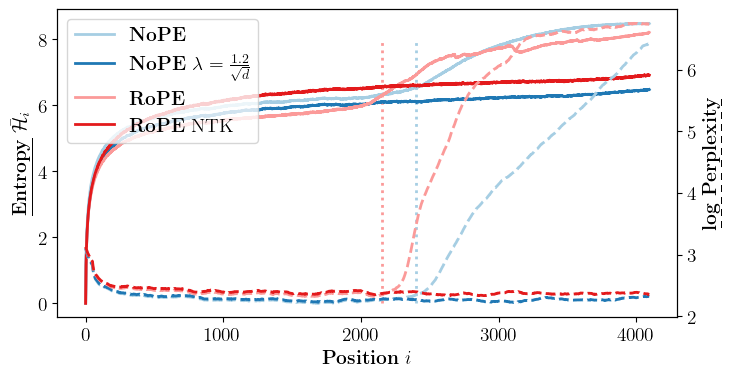

In [10]:
fig, ax1 = plt.subplots(figsize=(8, 4))
assert isinstance(ax1, plt.Axes)
ax1.set_xlabel(r'$\textbf{Position}\  i$', fontweight='bold')
ax1.set_ylabel(r'\textbf{\underline{Entropy}} $\bar{\mathcal{H}}_i$', fontweight='bold')

ax1.tick_params(axis='y')
plt.vlines(2150, 0, 8, color=plt.cm.Paired(4), linestyle="dotted", linewidth=2)
plt.vlines(2400, 0, 8, color=plt.cm.Paired(0), linestyle="dotted", linewidth=2)
ax2 = ax1.twinx() # create a second set of axes that shares the x-axis
ax2.set_ylabel(r'$\textbf{\dashuline{log Perplexity}}$')
# ax2.set_ylabel('log Perplexity')
ax2.tick_params(axis='y')

# x = np.arange(0, max_len)
# y = np.log2(x + 1)
# ax1.plot(x, y, color="black", linestyle="dashed")
sns.lineplot(df, ax=ax1, x="pos", y="ent", hue="model", palette=sns.color_palette("Paired", 2)+sns.color_palette("Paired", 6)[-2:], lw=2)

sns.lineplot(df, ax=ax2, x="pos", y="loss", hue="model", palette=sns.color_palette("Paired", 2)+sns.color_palette("Paired", 6)[-2:], linestyle="dashed", legend=False, lw=2)

ax1.legend(loc="upper left")
# ax1.legend(loc="upper left", bbox_to_anchor=(0, -0.1), ncol=4)
# fig.tight_layout()  # to ensure that the right y-label is not slightly clipped

In [11]:
fig.savefig(os.path.join("logs", "fig_vis_entro.pdf"),bbox_inches='tight', pad_inches=0.0, dpi=1000)